# MSiA 432 - Deep Learning - Final Project
## Group: Alejandra Lelo de Larrea Ibarra, Bannasorn Paspanthong, Ruben Nakano, Samuel Swain
# Style Transfering: Model Testing

Reference: https://anderfernandez.com/en/blog/how-to-code-neural-style-transfer-in-python/

In [1]:
# Import libraries 
from datetime import datetime
import tensorflow as tf
import numpy as np
from PIL import Image as im 

import keras
from keras import Model
from keras.utils import get_file, plot_model
from keras.optimizers import SGD
from tensorflow.keras.applications import vgg19, vgg16, resnet50, densenet

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

from pathlib import Path
import style_transfering as st

In [2]:
# Try to activate GPUs 
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print (f'Found GPU at {device_name}')

Metal device set to: Found GPU at /device:GPU:0
Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [5]:
# --- Common Parameters for all experiments ---

# Select base and style image
base_path = Path("../02_Data/face_age/010/755.png")
style_path = Path("../02_Data/Style Photos/WonderWoman.png")

# Set optimization parameters
learning_rate = 100.0
decay_steps = 100
decay_rate = 0.96
n_iter = 4000

# Weights 
style_weight = 1e-6
content_weight = 2.5e-8

Iteration 100: loss=10153.36
Iteration 200: loss=6451.05
Iteration 300: loss=4970.91
Iteration 400: loss=4125.93
Iteration 500: loss=3567.44
Iteration 600: loss=3174.25
Iteration 700: loss=2880.26
Iteration 800: loss=2650.69
Iteration 900: loss=2467.33
Iteration 1000: loss=2317.77
Iteration 1100: loss=2192.42
Iteration 1200: loss=2085.80
Iteration 1300: loss=1993.44
Iteration 1400: loss=1912.86
Iteration 1500: loss=1841.81
Iteration 1600: loss=1779.14
Iteration 1700: loss=1723.72
Iteration 1800: loss=1674.41
Iteration 1900: loss=1630.16
Iteration 2000: loss=1590.26
Iteration 2100: loss=1554.02
Iteration 2200: loss=1521.12
Iteration 2300: loss=1491.09
Iteration 2400: loss=1463.40
Iteration 2500: loss=1437.92
Iteration 2600: loss=1414.53
Iteration 2700: loss=1392.89
Iteration 2800: loss=1372.93
Iteration 2900: loss=1354.49
Iteration 3000: loss=1337.31
Iteration 3100: loss=1321.20
Iteration 3200: loss=1306.13
Iteration 3300: loss=1292.00
Iteration 3400: loss=1278.77
Iteration 3500: loss=1

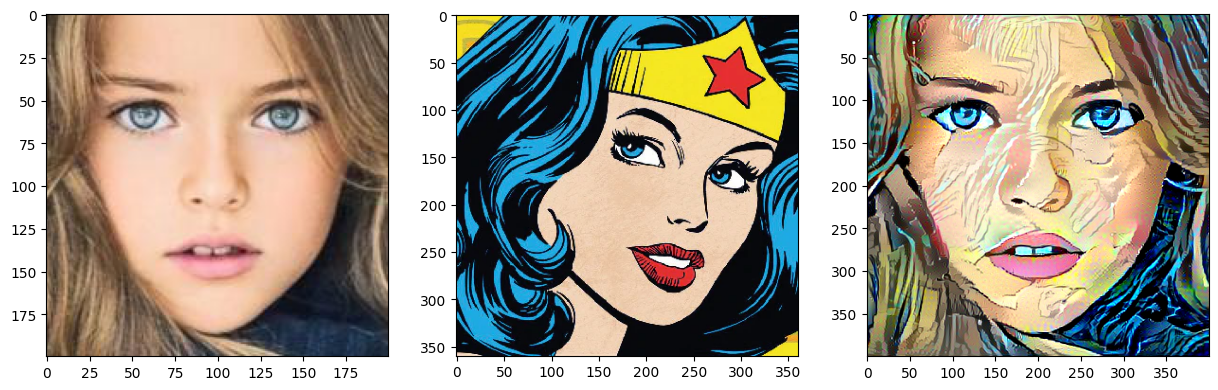

In [6]:
# --- Experiment 1: VGG19 ----
# Select pre-trained model
mod_name = "vgg19"
model = vgg19.VGG19(weights="imagenet", include_top=False)

# Path for result
final_img_path= Path("Results/ModelTesting/E1_vgg19.png")

# Dictionary of layers in the model: map layer names to outputs
outputs_dict= dict([(layer.name, layer.output) for layer in model.layers])

# New model: same model inputs, outputs as specified in outputs_dict
feature_extractor = Model(inputs = model.inputs, outputs = outputs_dict)

# Define layers to extract for the style and content 
style_layers = ["block1_conv1", "block2_conv1", "block3_conv1", "block4_conv1", "block5_conv1",]
content_layers = ["block5_conv2"]

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()


Iteration 100: loss=11720.77
Iteration 200: loss=6820.46
Iteration 300: loss=4934.60
Iteration 400: loss=3914.47
Iteration 500: loss=3270.44
Iteration 600: loss=2832.13
Iteration 700: loss=2517.84
Iteration 800: loss=2280.45
Iteration 900: loss=2093.95
Iteration 1000: loss=1943.61
Iteration 1100: loss=1820.65
Iteration 1200: loss=1719.11
Iteration 1300: loss=1633.74
Iteration 1400: loss=1561.02
Iteration 1500: loss=1498.16
Iteration 1600: loss=1443.10
Iteration 1700: loss=1394.73
Iteration 1800: loss=1351.62
Iteration 1900: loss=1313.12
Iteration 2000: loss=1278.40
Iteration 2100: loss=1246.84
Iteration 2200: loss=1218.38
Iteration 2300: loss=1192.69
Iteration 2400: loss=1169.28
Iteration 2500: loss=1147.84
Iteration 2600: loss=1128.19
Iteration 2700: loss=1110.09
Iteration 2800: loss=1093.41
Iteration 2900: loss=1077.98
Iteration 3000: loss=1063.65
Iteration 3100: loss=1050.30
Iteration 3200: loss=1037.82
Iteration 3300: loss=1026.19
Iteration 3400: loss=1015.23
Iteration 3500: loss=1

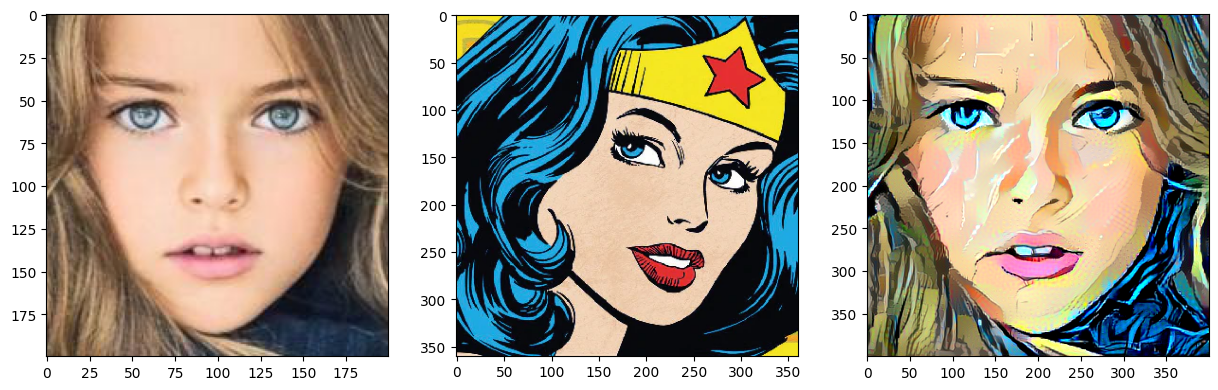

In [7]:
# --- Experiment 2: VGG16 ----
# Select pre-trained model
mod_name = "vgg16"
model = vgg16.VGG16(weights="imagenet", include_top=False)

# Path for result
final_img_path= Path("Results/ModelTesting/E2_vgg16.png")

# Dictionary of layers in the model: map layer names to outputs
outputs_dict= dict([(layer.name, layer.output) for layer in model.layers])

# New model: same model inputs, outputs as specified in outputs_dict
feature_extractor = Model(inputs = model.inputs, outputs = outputs_dict)

# Define layers to extract for the style and content 
style_layers = ["block1_conv1", "block2_conv1", "block3_conv1", "block4_conv1", "block5_conv1",]
content_layers = ["block5_conv2"]

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=0.00
Iteration 200: loss=0.00
Iteration 300: loss=0.00
Iteration 400: loss=0.00
Iteration 500: loss=0.00
Iteration 600: loss=0.00
Iteration 700: loss=0.00
Iteration 800: loss=0.00
Iteration 900: loss=0.00
Iteration 1000: loss=0.00
Iteration 1100: loss=0.00
Iteration 1200: loss=0.00
Iteration 1300: loss=0.00
Iteration 1400: loss=0.00
Iteration 1500: loss=0.00
Iteration 1600: loss=0.00
Iteration 1700: loss=0.00
Iteration 1800: loss=0.00
Iteration 1900: loss=0.00
Iteration 2000: loss=0.00
Iteration 2100: loss=0.00
Iteration 2200: loss=0.00
Iteration 2300: loss=0.00
Iteration 2400: loss=0.00
Iteration 2500: loss=0.00
Iteration 2600: loss=0.00
Iteration 2700: loss=0.00
Iteration 2800: loss=0.00
Iteration 2900: loss=0.00
Iteration 3000: loss=0.00
Iteration 3100: loss=0.00
Iteration 3200: loss=0.00
Iteration 3300: loss=0.00
Iteration 3400: loss=0.00
Iteration 3500: loss=0.00
Iteration 3600: loss=0.00
Iteration 3700: loss=0.00
Iteration 3800: loss=0.00
Iteration 3900: loss=

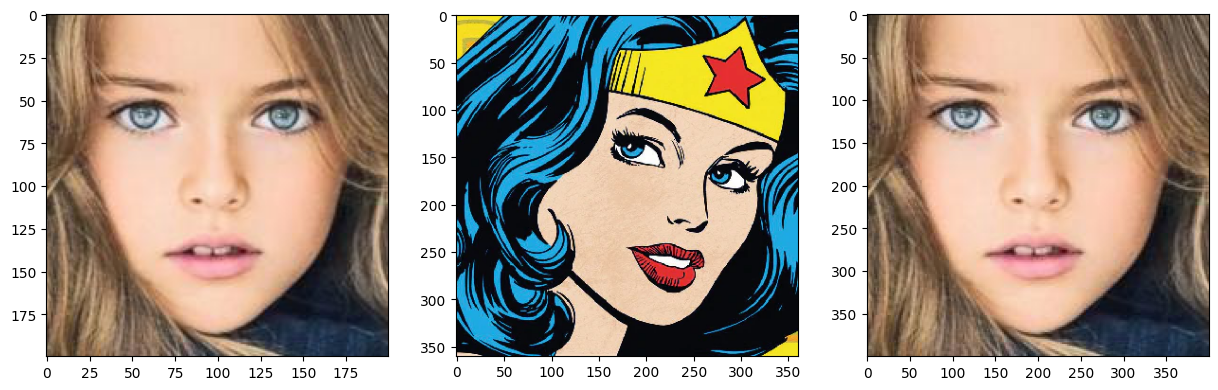

In [12]:
# --- Experiment 3: RESNET50 ----
# Select pre-trained model
mod_name = "resnet50"
model = resnet50.ResNet50(weights="imagenet", include_top=False)

# Path for result
final_img_path= Path("Results/ModelTesting/E3_resnet50.png")

# Dictionary of layers in the model: map layer names to outputs
outputs_dict= dict([(layer.name, layer.output) for layer in model.layers])

# New model: same model inputs, outputs as specified in outputs_dict
feature_extractor = Model(inputs = model.inputs, outputs = outputs_dict)

# Define layers to extract for the style and content 
style_layers = ["conv2_block1_1_conv", "conv2_block2_1_conv", "conv2_block3_1_conv", 
                "conv3_block1_1_conv", "conv3_block2_1_conv", "conv3_block3_1_conv", "conv3_block4_1_conv",
                "conv4_block1_1_conv", "conv4_block2_1_conv", "conv4_block3_1_conv", "conv4_block4_1_conv", "conv4_block5_1_conv", "conv4_block6_1_conv",
                "conv5_block1_1_conv", "conv5_block2_1_conv", "conv5_block3_1_conv",]
content_layers = ["conv5_block3_3_conv"]

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()


Iteration 100: loss=0.00
Iteration 200: loss=0.00
Iteration 300: loss=0.00
Iteration 400: loss=0.00
Iteration 500: loss=0.00
Iteration 600: loss=0.00
Iteration 700: loss=0.00
Iteration 800: loss=0.00
Iteration 900: loss=0.00
Iteration 1000: loss=0.00
Iteration 1100: loss=0.00
Iteration 1200: loss=0.00
Iteration 1300: loss=0.00
Iteration 1400: loss=0.00
Iteration 1500: loss=0.00
Iteration 1600: loss=0.00
Iteration 1700: loss=0.00
Iteration 1800: loss=0.00
Iteration 1900: loss=0.00
Iteration 2000: loss=0.00
Iteration 2100: loss=0.00
Iteration 2200: loss=0.00
Iteration 2300: loss=0.00
Iteration 2400: loss=0.00
Iteration 2500: loss=0.00
Iteration 2600: loss=0.00
Iteration 2700: loss=0.00
Iteration 2800: loss=0.00
Iteration 2900: loss=0.00
Iteration 3000: loss=0.00
Iteration 3100: loss=0.00
Iteration 3200: loss=0.00
Iteration 3300: loss=0.00
Iteration 3400: loss=0.00
Iteration 3500: loss=0.00
Iteration 3600: loss=0.00
Iteration 3700: loss=0.00
Iteration 3800: loss=0.00
Iteration 3900: loss=

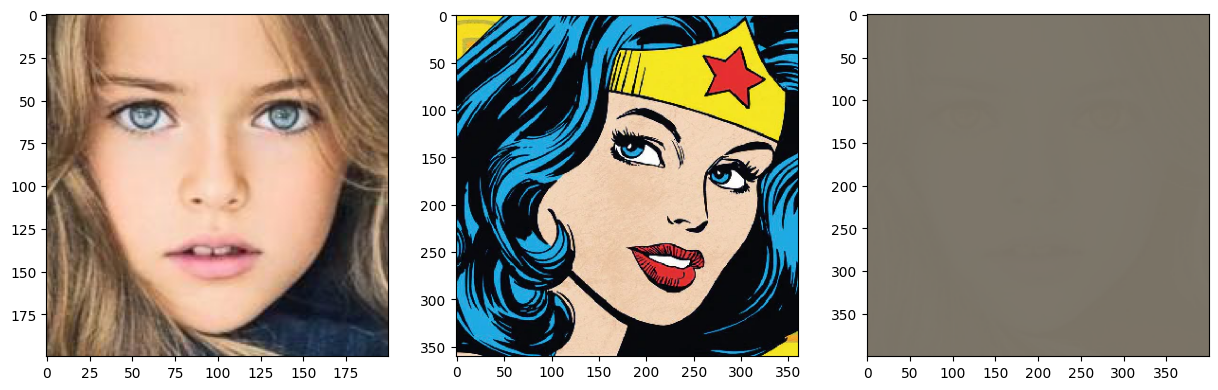

In [22]:
# --- Experiment 5: DenseNet121----
# Select pre-trained model
mod_name = "densenet121"
model = densenet.DenseNet121(weights="imagenet", include_top=False)

# Path to result
final_img_path= Path("Results/ModelTesting/E5_densenet121.png")

# Dictionary of layers in the model: map layer names to outputs
outputs_dict= dict([(layer.name, layer.output) for layer in model.layers])

# New model: same model inputs, outputs as specified in outputs_dict
feature_extractor = Model(inputs = model.inputs, outputs = outputs_dict)

# Define layers to extract for the style and content 
style_layers = ["conv2_block1_1_conv", "conv2_block2_1_conv", "conv2_block3_1_conv", "conv2_block4_1_conv", "conv2_block5_1_conv", "conv2_block6_1_conv", 
                "conv3_block1_1_conv", "conv3_block2_1_conv", "conv3_block3_1_conv", "conv3_block4_1_conv",
                "conv3_block5_1_conv", "conv3_block6_1_conv", "conv3_block7_1_conv", "conv3_block8_1_conv",
                "conv3_block9_1_conv", "conv3_block10_1_conv", "conv3_block11_1_conv", "conv3_block12_1_conv",
                "conv4_block1_1_conv", "conv4_block2_1_conv", "conv4_block3_1_conv", "conv4_block4_1_conv", "conv4_block5_1_conv", "conv4_block6_1_conv",
                "conv4_block7_1_conv", "conv4_block8_1_conv", "conv4_block9_1_conv", "conv4_block10_1_conv", "conv4_block11_1_conv", "conv4_block12_1_conv",
                "conv4_block13_1_conv", "conv4_block14_1_conv", "conv4_block15_1_conv", "conv4_block16_1_conv", "conv4_block17_1_conv", "conv4_block18_1_conv",
                "conv4_block19_1_conv", "conv4_block20_1_conv", "conv4_block21_1_conv", "conv4_block22_1_conv", "conv4_block23_1_conv", "conv4_block24_1_conv",
                "conv5_block1_1_conv", "conv5_block2_1_conv", "conv5_block3_1_conv", "conv5_block4_1_conv",
                "conv5_block5_1_conv", "conv5_block6_1_conv", "conv5_block7_1_conv", "conv5_block8_1_conv",
                "conv5_block9_1_conv", "conv5_block10_1_conv", "conv5_block11_1_conv", "conv5_block12_1_conv",
                "conv5_block13_1_conv", "conv5_block14_1_conv", "conv5_block15_1_conv", "conv5_block16_1_conv", ]
content_layers = ["conv5_block16_2_conv"]


# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()